<a href="https://colab.research.google.com/github/DionesGouvea/Michigan/blob/main/Applied%20Machine%20Learning%20in%20Python/Week%202/Assignment_2_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa 2
Nesta tarefa, você explorará a relação entre a complexidade do modelo e o desempenho da generalização, ajustando os principais parâmetros de vários modelos de aprendizado supervisionado. A Parte 1 desta tarefa examinará a regressão e a Parte 2 examinará a classificação.


## Parte 1 - Regressão

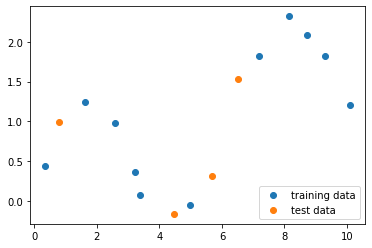

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import Image



np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

def intro():
    

    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);

intro()

### Questão 1

Escreva uma função que ajuste um modelo LinearRegression polinomial nos *dados de treinamento* `X_train` para os graus 1, 3, 6 e 9. (Use PolynomialFeatures em sklearn.preprocessing para criar os recursos polinomiais e depois ajustar um modelo de regressão linear) Para cada modelo, encontre 100 valores previstos no intervalo x = 0 a 10 (por exemplo, `np.linspace(0,10,100)`) e armazene isso em um array numpy. A primeira linha dessa matriz deve corresponder à saída do modelo treinado no grau 1, a segunda linha no grau 3, a terceira linha no grau 6 e a quarta linha no grau 9.


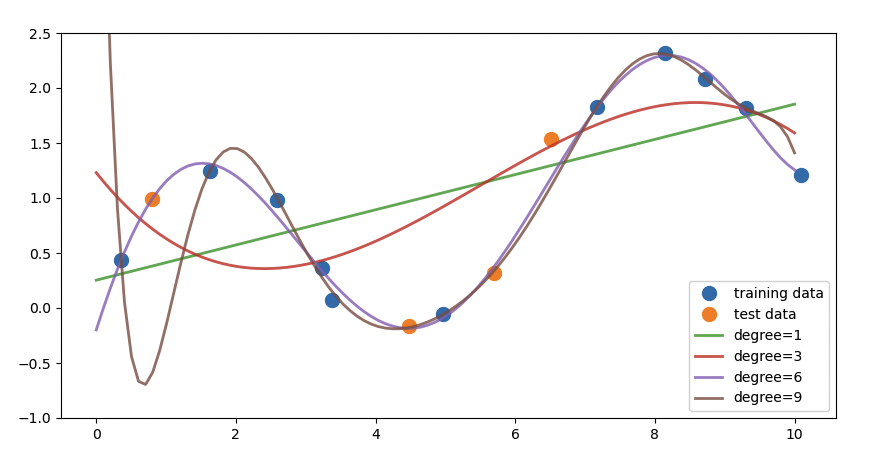

In [5]:
Image(filename='/content/polynomialreg1.png')

A figura acima mostra os modelos ajustados plotados sobre os dados originais (usando plot_one()).


*Esta função deve retornar um array numpy com formato `(4, 100)`*


In [6]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    degree_predictions = np.zeros((4,100))
    

    # YOUR CODE HERE
    
    #fazendo o reshape para um array 2D pois o polymialFeatures nao aceita 1D
    X_train_reshape = X_train.reshape(-1, 1)
    X_test_reshape = X_test.reshape(-1, 1)

    # Ajustando o grau 1
    poly1 = PolynomialFeatures(degree=1)
    X_train_poly1 = poly1.fit_transform(X_train_reshape )
    X_test_poly1 = poly1.transform(X_test_reshape)

    # Ajustando o grau 3
    poly3 = PolynomialFeatures(degree=3)
    X_train_poly3 = poly3.fit_transform(X_train_reshape )
    X_test_poly3 = poly3.transform(X_test_reshape)

    # Ajustando o grau 6
    poly6 = PolynomialFeatures(degree=6)
    X_train_poly6 = poly6.fit_transform(X_train_reshape )
    X_test_poly6 = poly6.transform(X_test_reshape)

    # Ajustando o grau 9
    poly9 = PolynomialFeatures(degree=9)
    X_train_poly9 = poly9.fit_transform(X_train_reshape)
    X_test_poly9 = poly9.transform(X_test_reshape)

    # Aplicando o modelo de regressão linear para cada grau
    model1 = LinearRegression().fit(X_train_poly1, y_train)
    model3 = LinearRegression().fit(X_train_poly3, y_train)
    model6 = LinearRegression().fit(X_train_poly6, y_train)
    model9 = LinearRegression().fit(X_train_poly9, y_train)

    #definindo o intervalo de predições 
    interval = np.linspace(0,10,100)
    
    #fazendo a predição para cada modelo dentro do intervalo, necessario reshape em cada valor para 2D
    degree_predictions[0] = model1.predict(poly1.transform(interval.reshape(-1, 1)))
    degree_predictions[1] = model3.predict(poly3.transform(interval.reshape(-1, 1)))
    degree_predictions[2] = model6.predict(poly6.transform(interval.reshape(-1, 1)))
    degree_predictions[3] = model9.predict(poly9.transform(interval.reshape(-1, 1)))
    
    return degree_predictions
answer_one()

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

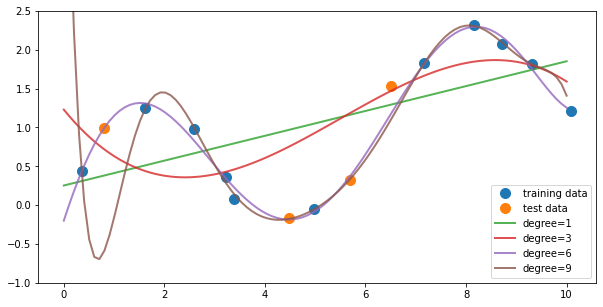

In [7]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
%matplotlib inline
def plot_one(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())


### Questão 2

Escreva uma função que se ajuste a um modelo LinearRegression polinomial nos dados de treinamento `X_train` para graus de 0 a 9. Para cada modelo, calcule a pontuação de regressão $R^2$ (coeficiente de determinação) nos dados de treinamento, bem como nos dados de teste, e retorne esses dois arrays em uma tupla.

*Esta função deve retornar uma tupla de arrays numpy `(r2_train, r2_test)`. Ambas as matrizes devem ter a forma `(10,)`*

In [8]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import r2_score

    r2_train = np.array([])
    r2_test = np.array([])
    
    #fazendo o reshape para um array 2D pois o polymialFeatures nao aceita 1D
    X_train_reshape = X_train.reshape(-1, 1)
    X_test_reshape = X_test.reshape(-1, 1)

    #criando algumas listas para armazenar os resultados de treinamento 
    models = []
    polys = []
    #criando um for par fazer os 10 degrees 0-9
    for degree in range(0, 10):
      poly = PolynomialFeatures(degree=degree)
      X_train_poly = poly.fit_transform(X_train_reshape)
      X_test_poly = poly.transform(X_test_reshape)
      polys.append((X_train_poly, X_test_poly))
      model = LinearRegression().fit(X_train_poly, y_train)
      models.append(model)
   
    #este for e para fazer o predict de treino e teste e aplicar o R2 nos degress de 0 - 9
    for i, model in enumerate(models):
      X_pred = model.predict(polys[i][0])
      y_pred = model.predict(polys[i][1])
      score_x = r2_score(y_train,X_pred)
      score_y = r2_score(y_test, y_pred)
     
      r2_train = np.append(r2_train,score_x)
      r2_test = np.append(r2_test,score_y)
    
    return (r2_train,r2_test)

answer_two()

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.63247951, -0.64525377]))

### Questão 3

Com base em 𝑅2 pontuações da questão 2 (níveis de Grau de 0 a 9), qual nível de Grau corresponde a um modelo que está subajustado? Qual nível de Grau corresponde a um modelo que está superajustado? Qual escolha de nível de Grau forneceria um modelo com bom desempenho de generalização neste conjunto de dados?

(Dica: tente plotar o 𝑅2
  pontuações da questão 2 para visualizar a relação)

Esta função deve retornar uma tupla com os valores dos graus nesta ordem: (Underfitting, Overfitting, Good_Generalization)

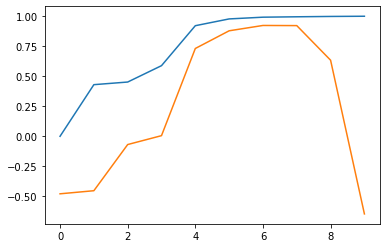

In [9]:
graf = answer_two()
x = [0,1,2,3,4,5,6,7,8,9]
plt.plot(x, graf[0])
plt.plot(x,graf[1])

In [10]:
def answer_three():
    tup = (1,9,7)
    return tup
answer_three()
    

(1, 9, 7)

### Questão 4

Modelos de treinamento em recursos polinomiais de alto grau podem resultar em overfitting. Treine dois modelos: um modelo LinearRegression não regularizado e um modelo Lasso Regression (com parâmetros `alpha=0.01`, `max_iter=10000`, `tol=0.1`) em recursos polinomiais de grau 12. Retorne o $R^2$ pontuação para os conjuntos de teste do modelo LinearRegression e Lasso.

*Esta função deve retornar uma tupla `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

In [20]:
def answer_four():
  from sklearn import linear_model
  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import r2_score

  # Transformando o shape do X_train e X_test para ser usado no modelo
  X_train_reshape = X_train.reshape(-1, 1)
  X_test_reshape = X_test.reshape(-1, 1)

  # Ajustando o grau polinomial para 12
  poly12 = PolynomialFeatures(degree=12) 
  X_train_poly12 = poly12.fit_transform(X_train_reshape )
  X_test_poly12 = poly12.transform(X_test_reshape)

  # Treinando os modelos LinearRegression e Lasso
  modelLinear = LinearRegression().fit(X_train_poly12, y_train)
  modelLasso = linear_model.Lasso(alpha=0.01, max_iter = 10000, tol = 0.1).fit(X_train_poly12, y_train)

  # Fazendo a predição dos modelos e calculando o R2_score 
  linearPred = modelLinear.predict(X_test_poly12)
  linear_r2 = r2_score(y_test, linearPred)
  lassoPred = modelLasso.predict(X_test_poly12)
  lasso_r2 = r2_score(y_test, lassoPred)
  
  # Retornando o R2_score dos modelos LinearRegression e Lasso
  return linear_r2,lasso_r2

answer_four()

(-4.312001797497546, 0.6051396919570032)

### Part 2 - Classification
Para esta seção da tarefa, trabalharemos com o UCI Mushroom Data Set armazenado em mushrooms.csv. Os dados serão usados ​​para testar um modelo para prever se um cogumelo é ou não venenoso. Os seguintes atributos são fornecidos:

Informações do atributo:

cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
bruises?: bruises=t, no=f
odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
gill-attachment: attached=a, descending=d, free=f, notched=n
gill-spacing: close=c, crowded=w, distant=d
gill-size: broad=b, narrow=n
gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
stalk-shape: enlarging=e, tapering=t
stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s
stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
veil-type: partial=p, universal=u
veil-color: brown=n, orange=o, white=w, yellow=y
ring-number: none=n, one=o, two=t
ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

Os dados no conjunto de dados dos cogumelos estão atualmente 
codificados com strings. Esses valores precisarão ser codificados como numéricos para funcionar com o sklearn. Usaremos pd.get_dummies para converter as variáveis ​​categóricas em variáveis ​​indicadoras.